In [4]:
import turicreate

In [7]:
sales = turicreate.SFrame('/content/drive/My Drive/Colab Notebooks/Coursera/Course1/data/home_data_sframe/m_1ce96d9d245ca490.frame_idx')

In [23]:
train_data, test_data = sales.random_split(.8,seed=0)

In [24]:
sqft_model = turicreate.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.003326     | 4344941.006785     | 1857097.582133       | 264580.789549                   | 229673.793103                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [27]:
sqft_model.evaluate(test_data)

{'max_error': 4139992.6473355414, 'rmse': 255204.2236467818}

In [28]:
import matplotlib.pyplot as plt

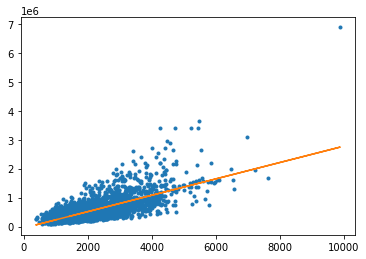

In [29]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [ ]:
my_feature = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
sales[my_feature].show()

In [34]:
my_feature_model = turicreate.linear_regression.create(train_data,target='price',features=my_feature)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.024840     | 4079007.753679     | 2773938.356881       | 188196.871220                   | 208096.074998                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [36]:
print(my_feature_model.evaluate(test_data))
print(sqft_model.evaluate(test_data))

{'max_error': 3145652.0719738626, 'rmse': 180309.66653554366}
{'max_error': 4139992.6473355414, 'rmse': 255204.2236467818}


In [44]:
house1 = sales[sales['id']=='5309101200']
house2 = sales[sales['id']=='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [46]:
print(my_feature_model.predict(house2))
print(sqft_model.predict(house2))

[1234187.7374609131]
[1262242.9485487032]


In [ ]:
bill_gates = {}